In [20]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore") 

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score 

In [21]:
path = r"/home/superadmin/Documents/dataset_clean.csv"
TARGET = 'Label'

In [22]:
df = pd.read_csv(path)

In [23]:
df = df[['Init_Win_bytes_forward',
'Total Length of Fwd Packets',
'Bwd Header Length',
'Destination Port',
'Subflow Fwd Bytes',
'Packet Length Std',
'Packet Length Variance',
'Bwd Packets/s',
'Average Packet Size',
'Bwd Packet Length Std',
         "Label"]]

In [24]:
y = df[TARGET]
X = df.drop([TARGET],axis=1)

In [25]:
y = y.to_numpy()
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))

In [29]:
df["Label"].value_counts()

1    22506
0     2241
Name: Label, dtype: int64

# Model

## Cross Validation

In [30]:
## modèle de base pour la recherche des paramètres optimaux 

def create_model(activation='relu', number_of_neurons=256, number_of_layers=2, init_mode='uniform'):
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, 10),kernel_initializer=init_mode, activation=activation))
    for i in range(number_of_layers):
        model.add(Dense(number_of_neurons, activation=activation))
    model.add(Dense(y.shape[1], activation='sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    
    return model

skmodel = KerasClassifier(build_fn=create_model) 

params = {'activation':['relu', 'tanh'], 
          'batch_size':[4, 8, 16, 32, 64],
          'epochs':[20, 50, 100, 200, 500],
          'init_mode':['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'],
          'number_of_layers':[3,5,7,9,11],
          'number_of_neurons':[8,16,32,64,128,256]
}

random_search = RandomizedSearchCV(skmodel, param_distributions=params, cv=5, n_jobs=-1)

random_search_results = random_search.fit(X_train, y_train, verbose=0) 
print("Best: {} using {}".format(np.round(random_search_results.best_score_,4), random_search_results.best_params_))

2023-03-20 12:42:51.143847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 12:42:51.192042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 12:42:51.193351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-03-20 12:42:52.113733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-20 12:42:52.114045: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-20 12:42:52.114057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-03-20 12:42:52.147646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory


2023-03-20 12:42:53.039848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-20 12:42:53.040000: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-20 12:42:53.040031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (m4-18): /proc/driver/nvidia/version does not exist
2023-03-20 12:42:53.040303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 12:42:53.061473: W tensorflow/compiler/xla/stream_executor/platform

55/55 [==============================] - 3s 5ms/step - loss: 0.0698 - accuracy: 0.9680


2023-03-20 13:03:20.647527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:03:21.314719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 13:03:21.315349: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


25/55 [============>.................] - ETA: 0s - loss: 0.0823 - accuracy: 0.9694

2023-03-20 13:03:24.205397: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-20 13:03:24.207182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-20 13:03:24.207214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


55/55 [==============================] - 4s 6ms/step - loss: 0.0827 - accuracy: 0.9691


2023-03-20 13:03:26.901883: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-20 13:03:26.902234: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-20 13:03:26.902267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (m4-18): /proc/driver/nvidia/version does not exist
2023-03-20 13:03:26.902614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:03:29.832567: I tensorflow/core/platform/cpu_feature_guard.cc:19

55/55 [==============================] - 4s 9ms/step - loss: 0.0732 - accuracy: 0.9659


2023-03-20 13:37:33.401446: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:37:34.182208: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 13:37:34.184809: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 13:37:36.968045: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

217/217 [==============================] - 4s 9ms/step - loss: 29.9918 - accuracy: 0.9758


2023-03-20 15:05:57.687326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 15:05:58.067158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 15:05:58.070642: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 15:05:59.158446: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX

217/217 [==============================] - 3s 8ms/step - loss: 0.0884 - accuracy: 0.9703


2023-03-20 15:06:56.500605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 15:06:56.969100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 15:06:56.970567: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 15:06:58.388757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX

217/217 [==============================] - 3s 8ms/step - loss: 2.0821 - accuracy: 0.9801


2023-03-20 15:10:53.430033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 15:10:53.988977: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 15:10:53.989377: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 15:10:56.526944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

434/434 [==============================] - 4s 6ms/step - loss: 1.3993 - accuracy: 0.9697


2023-03-20 16:26:33.091483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:26:33.602132: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 16:26:33.602399: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 16:26:35.560368: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

433/433 [==============================] - 5s 5ms/step - loss: 0.1647 - accuracy: 0.9607


2023-03-20 16:37:34.950209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:37:35.442955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 16:37:35.445738: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 16:37:37.688001: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

433/433 [==============================] - 4s 5ms/step - loss: 0.1553 - accuracy: 0.9639


2023-03-20 16:39:24.102507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:39:24.514659: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 16:39:24.514702: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-20 16:39:26.682233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

433/433 [==============================] - 1s 753us/step - loss: 0.1628 - accuracy: 0.9599


2023-03-20 17:40:36.150600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-20 17:40:36.150623: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-20 17:40:36.150636: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (m4-18): /proc/driver/nvidia/version does not exist
2023-03-20 17:40:36.150823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best: 0.9745 using {'number_of_neurons': 256, 'number_of_layers': 11, 'init_mode': 'he_uniform', 'epochs': 500, 'batch_size': 16, 'activation': 'relu'}


In [20]:
model = Sequential()

model.add(LSTM(128, input_shape=(1, 10),activation="relu",return_sequences=True))
model.add(LSTM(128,activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss = 'weighted_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 128)            71168     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 203,010
Trainable params: 203,010
Non-trainable params: 0
_________________________________________________________________


In [21]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

In [22]:
history = model.fit(X_train, y_train, 
                    epochs = 25, 
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/25


ValueError: in user code:

    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2663, in get
        return deserialize(identifier)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\legacy\serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'weighted_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [23]:
accuracy = model.evaluate(X_test, y_test)
accuracy # 0.9650

ValueError: in user code:

    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2663, in get
        return deserialize(identifier)
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "C:\Users\sonia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\legacy\serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'weighted_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


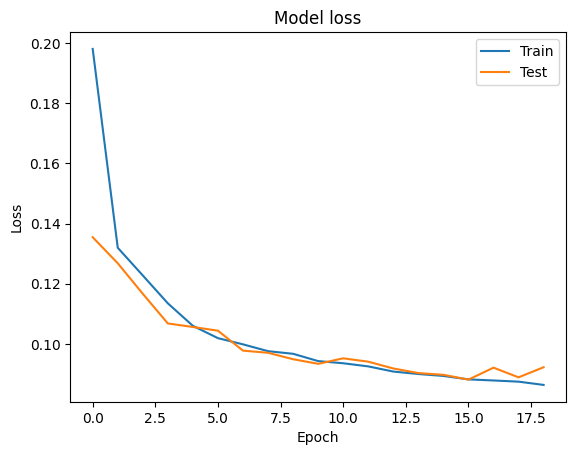

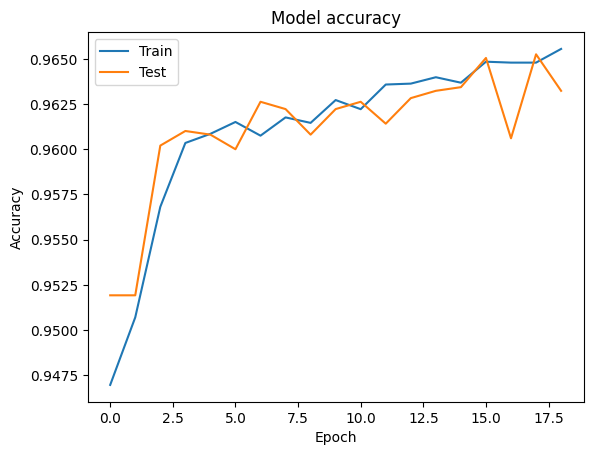

In [24]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])